<a href="https://colab.research.google.com/github/Alisser2001/QuantumMachineLearning/blob/emmadev/LOFBaseballQML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd

# URL del archivo raw en GitHub
url = "https://raw.githubusercontent.com/Alisser2001/QuantumMachineLearning/emmadev/baseball.dat"

# Descargar el contenido del archivo
response = requests.get(url)
lines = [line.strip() for line in response.text.splitlines()]

# Extraer atributos
attributes = [line.split()[1] for line in lines if line.startswith("@attribute")]

# Extraer datos (después de @data)
data_start = lines.index("@data") + 1
data = [line.split(",") for line in lines[data_start:] if line]

# Crear DataFrame
df = pd.DataFrame(data, columns=attributes).astype(float)

print(df.head())


   Batting_average  On-base_percentage   Runs   Hits  Doubles  Triples  \
0            0.271               0.328   74.0  161.0     22.0      6.0   
1            0.264               0.318   24.0   48.0      7.0      0.0   
2            0.251               0.338  101.0  141.0     35.0      3.0   
3            0.224               0.274   28.0   94.0     21.0      1.0   
4            0.206               0.262   14.0   51.0     18.0      1.0   

   HomeRuns  Runs_batted_in  Walks  Strike-Outs  Stolen_bases  Errors  \
0      12.0            58.0   49.0        133.0          23.0    17.0   
1       1.0            22.0   15.0         18.0           0.0     7.0   
2      32.0           105.0   71.0        104.0          34.0     6.0   
3       1.0            44.0   27.0         54.0           2.0     7.0   
4       1.0            28.0   17.0         26.0           0.0     3.0   

   Free_agency_eligibility  Free_agent  Arbitration_eligibility  Arbitration  \
0                      1.0         1

In [3]:
# =========================
# SETUP: paleta 'pastel' (nativa de seaborn)
# =========================
import math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

palette_name = "pastel"
sns.set_theme(style="whitegrid", context="notebook", palette=palette_name, font_scale=1.05)
pal = sns.color_palette(palette_name)

# colores explícitos extraídos de la paleta
color_main  = pal[2]    # para histogramas / puntos
color_kde   = pal[1]    # para KDE / líneas suaves
color_accent= pal[-1]   # para líneas de regresión o destaque
box_color   = pal[0]    # para boxplots inset

print("Paleta aplicada:", palette_name, " — Colores:", pal)


Paleta aplicada: pastel  — Colores: [(0.6313725490196078, 0.788235294117647, 0.9568627450980393), (1.0, 0.7058823529411765, 0.5098039215686274), (0.5529411764705883, 0.8980392156862745, 0.6313725490196078), (1.0, 0.6235294117647059, 0.6078431372549019), (0.8156862745098039, 0.7333333333333333, 1.0), (0.8705882352941177, 0.7333333333333333, 0.6078431372549019), (0.9803921568627451, 0.6901960784313725, 0.8941176470588236), (0.8117647058823529, 0.8117647058823529, 0.8117647058823529), (1.0, 0.996078431372549, 0.6392156862745098), (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]


In [4]:
# Vista rápida de los datos
print("Dimensiones:", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nDescripción estadística:")
display(df.describe().T)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nTipo de datos por columna:")
print(df.dtypes)

Dimensiones: (337, 17)

Primeras filas:


,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary
0,0.271,0.328,74.0,161.0,22.0,6.0,12.0,58.0,49.0,133.0,23.0,17.0,1.0,1.0,0.0,0.0,109.0
1,0.264,0.318,24.0,48.0,7.0,0.0,1.0,22.0,15.0,18.0,0.0,7.0,0.0,0.0,0.0,0.0,160.0
2,0.251,0.338,101.0,141.0,35.0,3.0,32.0,105.0,71.0,104.0,34.0,6.0,0.0,0.0,1.0,0.0,2700.0
3,0.224,0.274,28.0,94.0,21.0,1.0,1.0,44.0,27.0,54.0,2.0,7.0,1.0,1.0,0.0,0.0,550.0
4,0.206,0.262,14.0,51.0,18.0,1.0,1.0,28.0,17.0,26.0,0.0,3.0,1.0,1.0,0.0,0.0,300.0



Descripción estadística:


,count,mean,std,min,25%,50%,75%,max
Batting_average,337.0,0.257825,0.039546,0.063,0.238,0.260,0.281,0.457
On-base_percentage,337.0,0.323973,0.047132,0.063,0.297,0.323,0.354,0.486
Runs,337.0,46.697329,29.020166,0.000,22.000,41.000,69.000,133.000
Hits,337.0,92.833828,51.896322,1.000,51.000,91.000,136.000,216.000
Doubles,337.0,16.673591,10.452001,0.000,9.000,15.000,23.000,49.000
Triples,337.0,2.338279,2.543336,0.000,0.000,2.000,3.000,15.000
HomeRuns,337.0,9.097923,9.289934,0.000,2.000,6.000,15.000,44.000
Runs_batted_in,337.0,44.020772,29.559406,0.000,21.000,39.000,66.000,133.000
Walks,337.0,35.017804,24.842474,0.000,15.000,30.000,49.000,138.000
Strike-Outs,337.0,56.706231,33.828784,1.000,31.000,49.000,78.000,175.000



Valores nulos por columna:
Batting_average            0
On-base_percentage         0
Runs                       0
Hits                       0
Doubles                    0
Triples                    0
HomeRuns                   0
Runs_batted_in             0
Walks                      0
Strike-Outs                0
Stolen_bases               0
Errors                     0
Free_agency_eligibility    0
Free_agent                 0
Arbitration_eligibility    0
Arbitration                0
Salary                     0
dtype: int64

Tipo de datos por columna:
Batting_average            float64
On-base_percentage         float64
Runs                       float64
Hits                       float64
Doubles                    float64
Triples                    float64
HomeRuns                   float64
Runs_batted_in             float64
Walks                      float64
Strike-Outs                float64
Stolen_bases               float64
Errors                     float64
Free_agency_eligib

confirmamos que no hay valores nulos y que todos son números, por lo tanto no es necesario pensar en una transformación ni en una imputación de datos

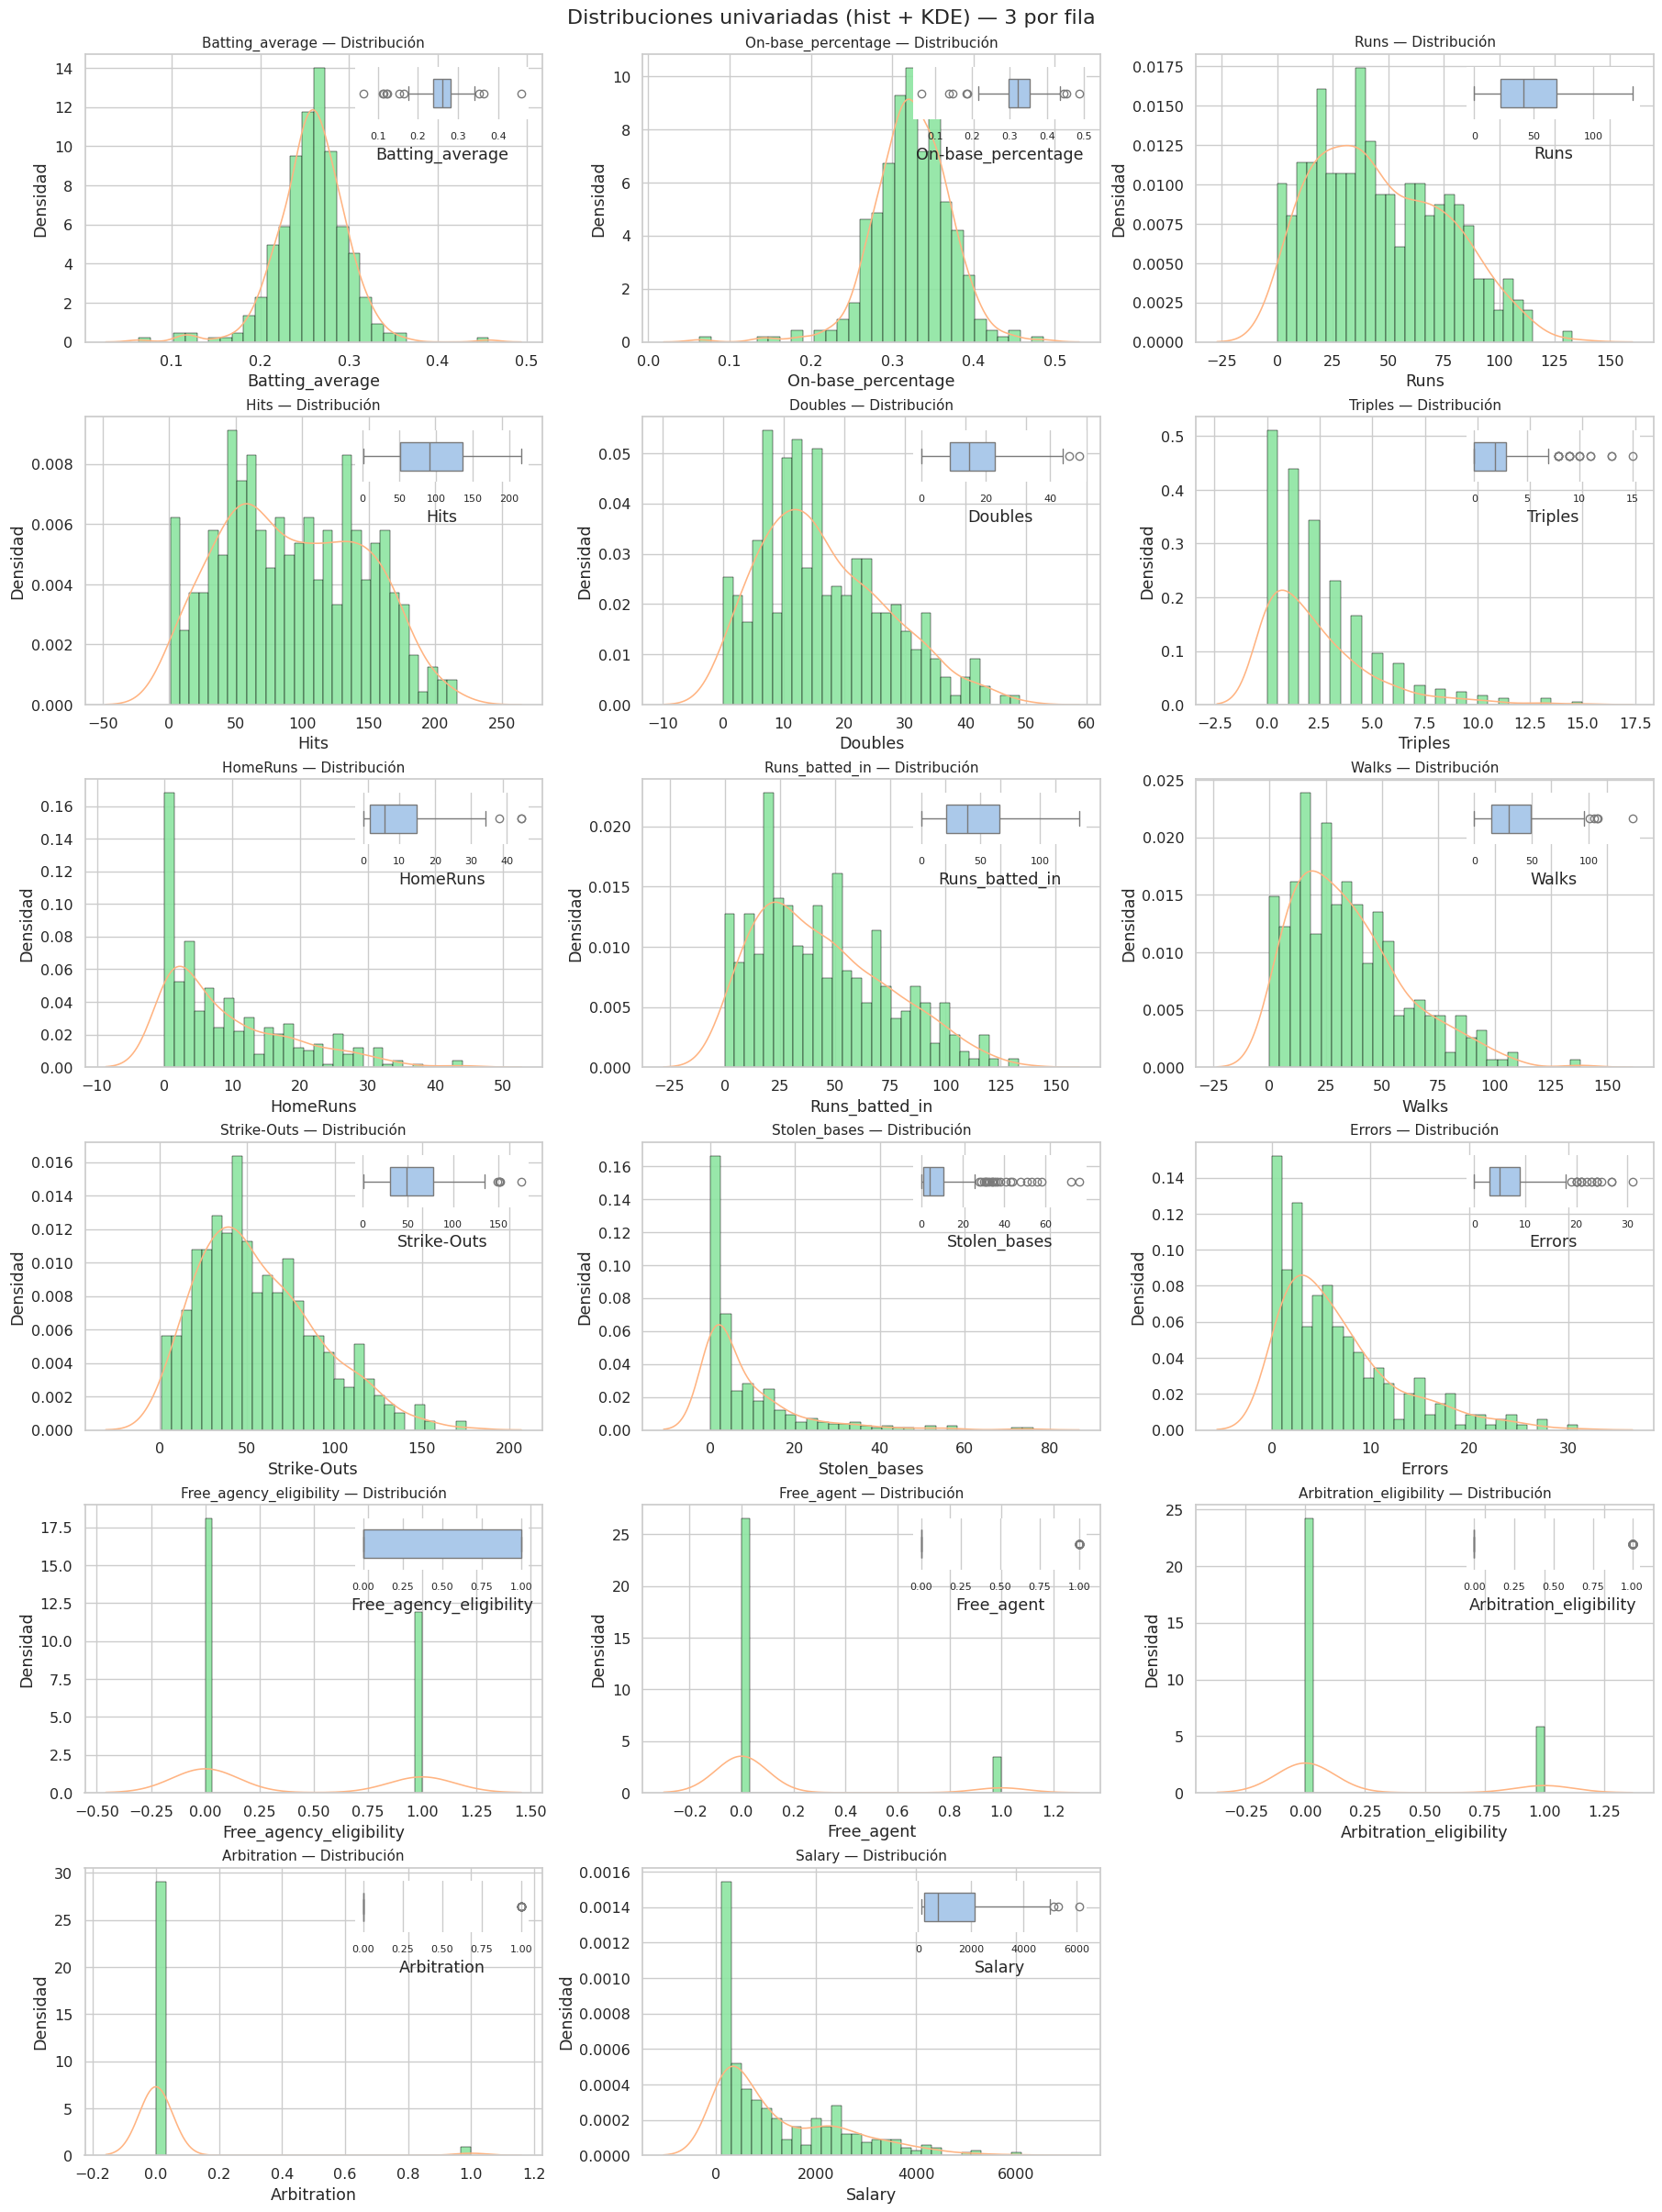

In [5]:
cols = df.columns.tolist()
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], kde=False, bins=30, ax=ax, stat="density",
                 color=color_main, edgecolor="black", linewidth=0.35, alpha=0.9)
    sns.kdeplot(df[col], ax=ax, color=color_kde, linewidth=1.15)
    ax.set_title(f"{col} — Distribución", fontsize=11)
    ax.set_ylabel("Densidad")

    axins = inset_axes(ax, width="38%", height="18%", loc='upper right', borderpad=0.9)
    sns.boxplot(x=df[col], ax=axins, orient="h", width=0.55, color=box_color)
    axins.set_yticks([])
    axins.tick_params(axis='both', which='both', labelsize=8)
    for spine in axins.spines.values():
        spine.set_visible(False)

for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])


fig.suptitle("Distribuciones univariadas (hist + KDE) — 3 por fila", fontsize=16)

plt.show()


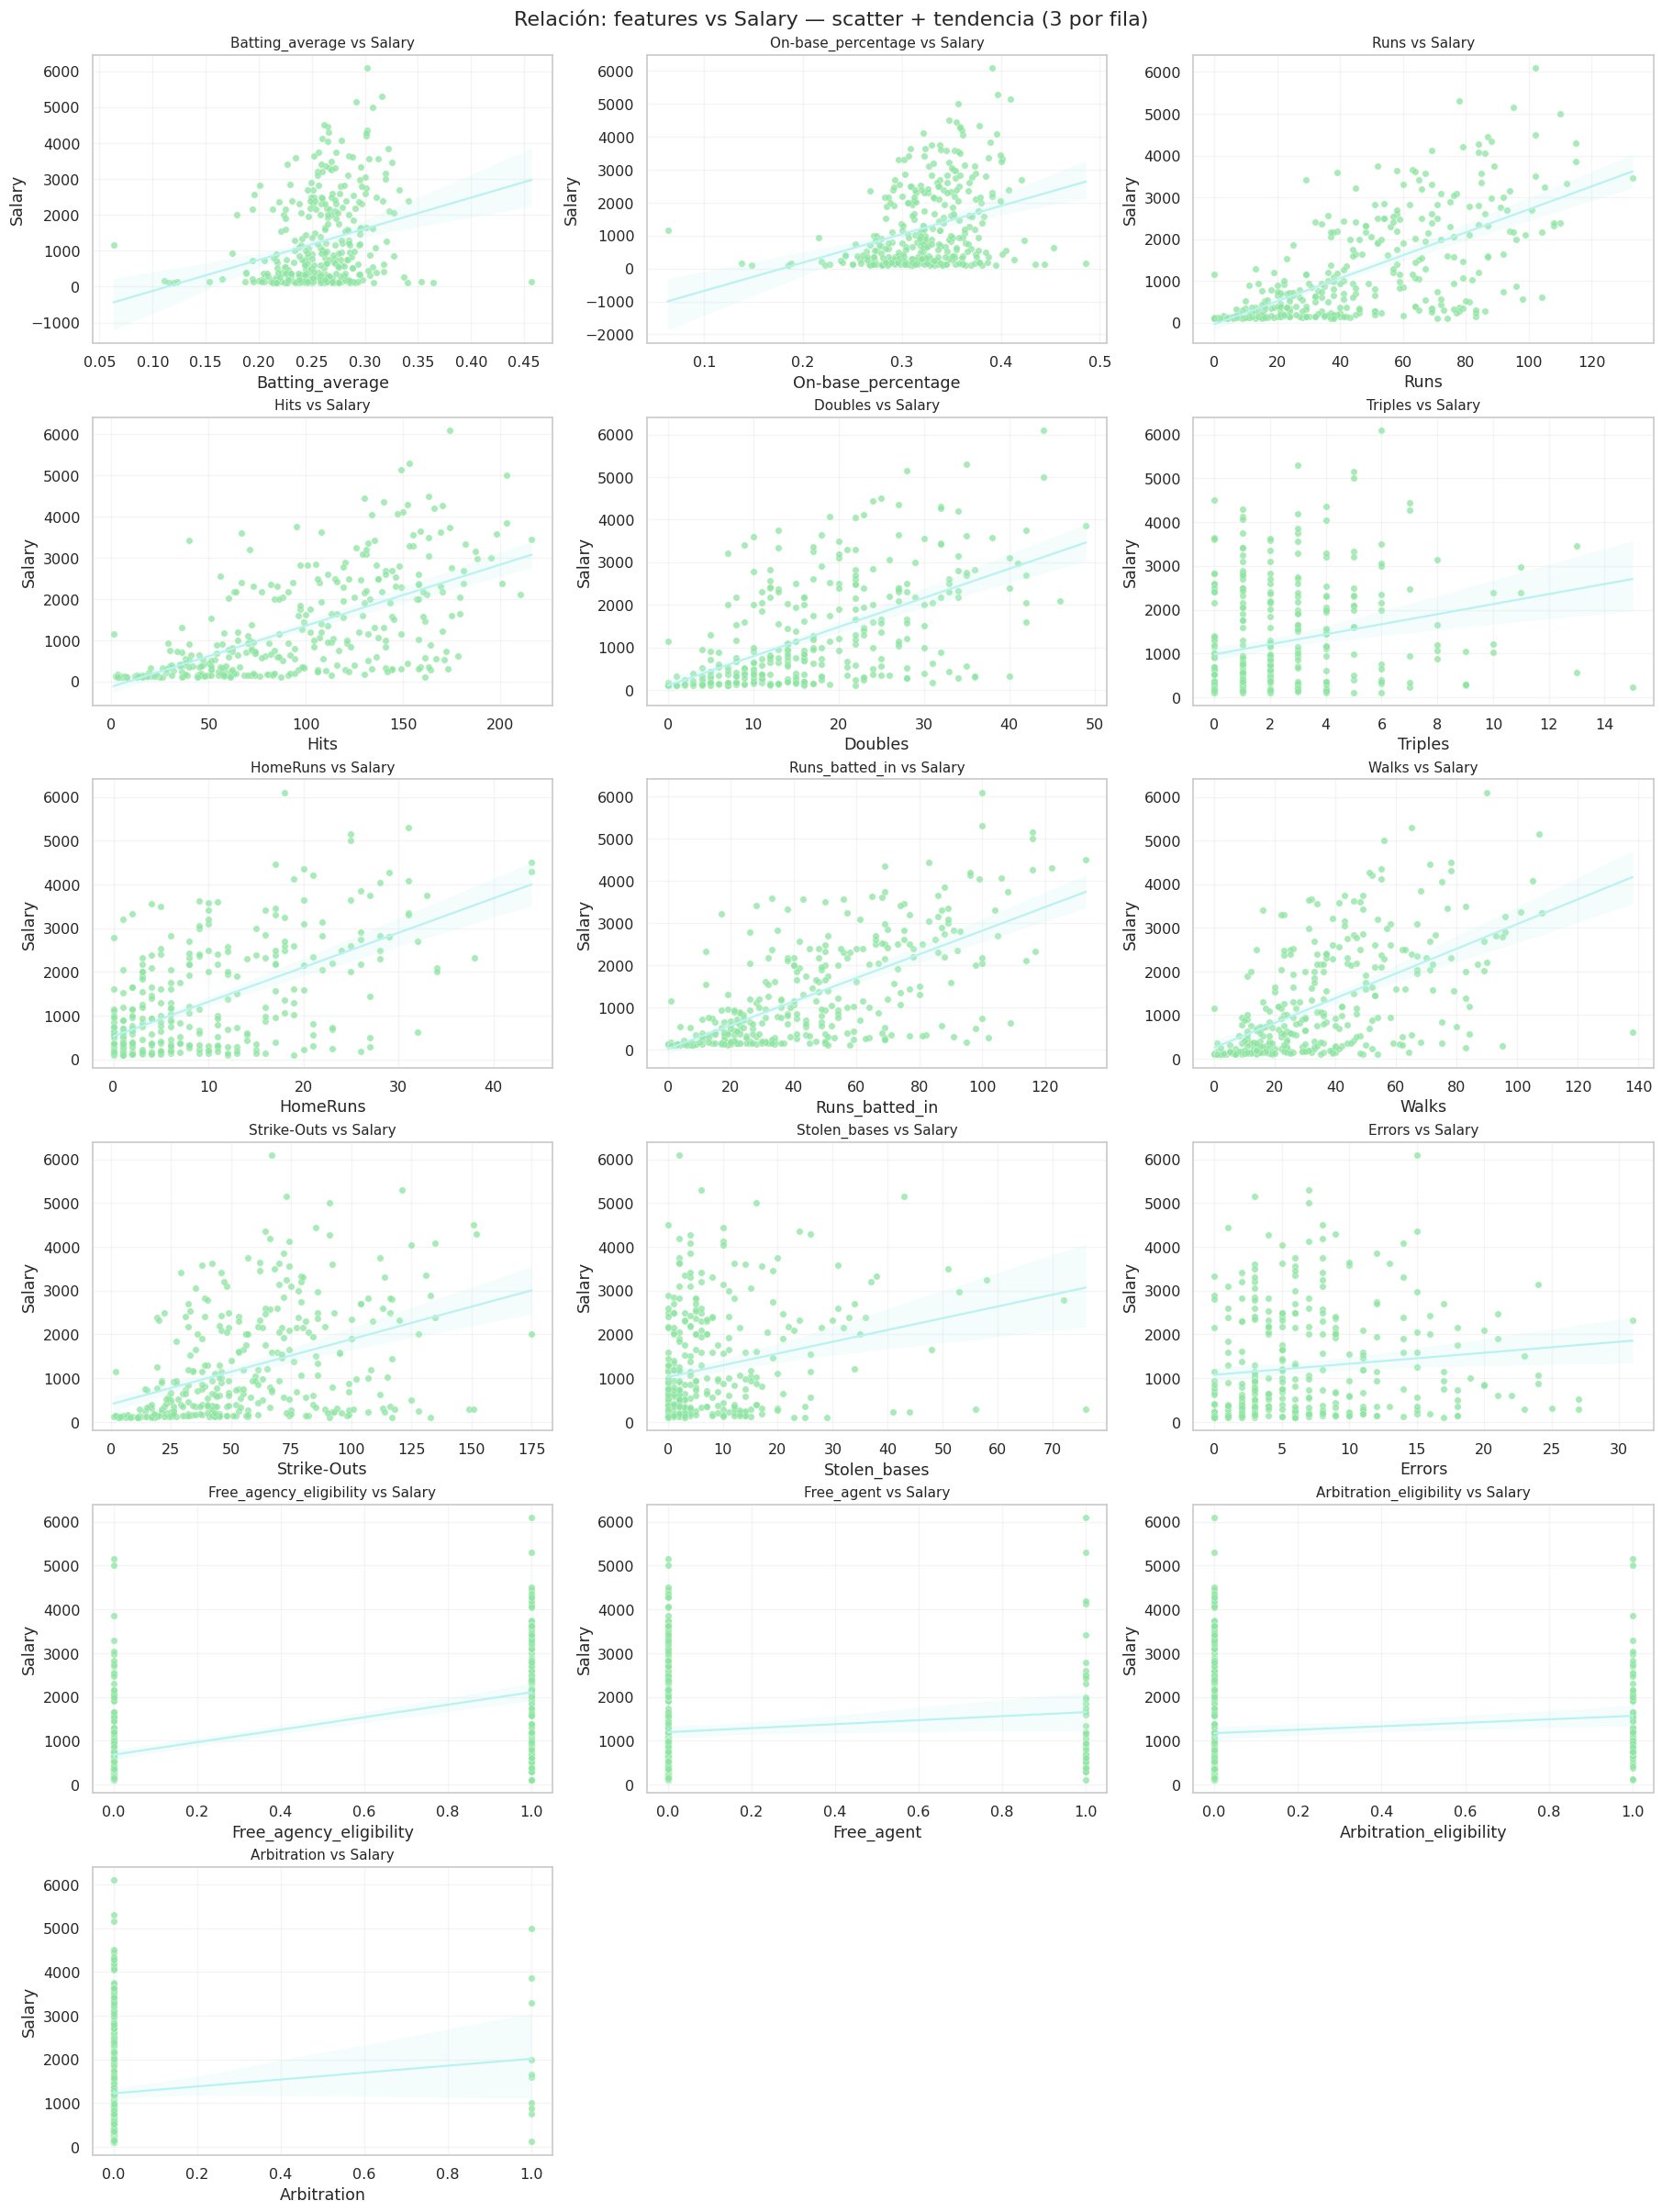

In [6]:
target = "Salary"
features = [c for c in df.columns if c != target]
n = len(features)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]
    sns.scatterplot(x=df[feat], y=df[target], ax=ax,
                    color=color_main, edgecolor="w", linewidth=0.25, s=28, alpha=0.75)
    sns.regplot(x=df[feat], y=df[target], scatter=False, ax=ax, truncate=True,
                line_kws={"linewidth":1.6, "color": color_accent})
    ax.set_title(f"{feat} vs {target}", fontsize=11)
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.grid(alpha=0.2)

for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle(f"Relación: features vs {target} — scatter + tendencia (3 por fila)", fontsize=16)
plt.show()


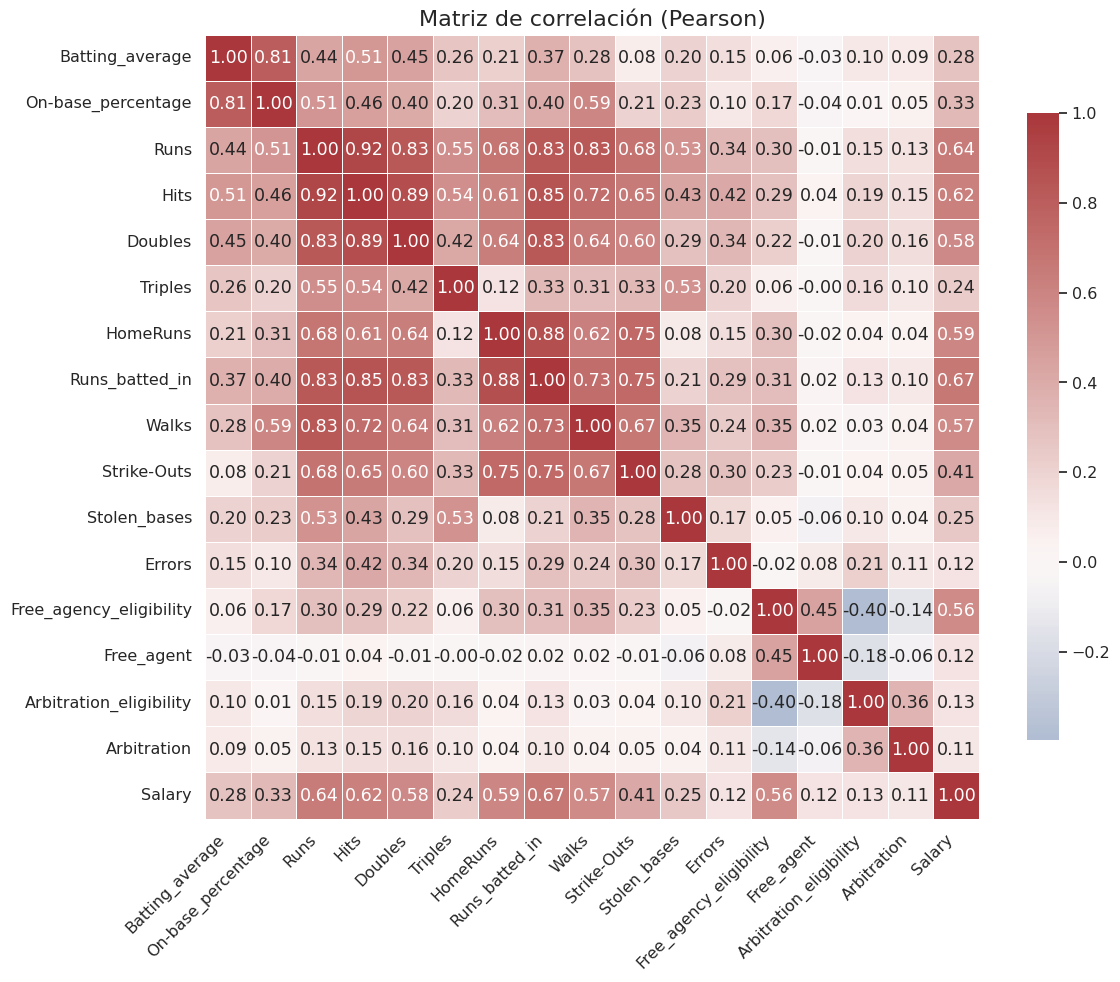


Correlación con la variable objetivo (orden descendente):


,Salary
Salary,1.000000
Runs_batted_in,0.668422
Runs,0.642903
Hits,0.621239
HomeRuns,0.590454
Doubles,0.577423
Walks,0.567085
Free_agency_eligibility,0.564586
Strike-Outs,0.405494
On-base_percentage,0.326676


In [7]:
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0, linewidths=0.5, cbar_kws={"shrink":0.8})
plt.title("Matriz de correlación (Pearson)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCorrelación con la variable objetivo (orden descendente):")
display(corr[target].sort_values(ascending=False))





---



In [8]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [9]:

# Parámetros
features = df.columns.tolist()  # lista explícita

X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) Ajustar LOF
lof = LocalOutlierFactor(novelty=False)
y_pred = lof.fit_predict(X_scaled)  # 1 -> inlier, -1 -> outlier
neg_lof_scores = lof.negative_outlier_factor_  # valores negativos: más negativo = más atípico
# convertimos a score positivo (cuanto mayor, más atípico)
lof_score = -neg_lof_scores

In [10]:
# Añadir columnas al DataFrame original (no escala)
df = df.copy()  # evitar modificar df original fuera del scope
df["lof_score"] = lof_score
df["is_outlier"] = y_pred == -1

# 4) Resumen rápido
n_outliers = df["is_outlier"].sum()
print(f"Total de muestras: {len(df)}")
print(f"Outliers detectados (is_outlier=True): {n_outliers}  —  Contamination usado: {20}")

# Mostrar top N más atípicos (por lof_score)
top_n = 10
print(f"\nTop {top_n} muestras más atípicas (por lof_score):")
display(df.sort_values("lof_score", ascending=False).head(top_n))

# 5) Visualizaciones: univariadas y bivariadas con outliers destacados
cols = features
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

Total de muestras: 337
Outliers detectados (is_outlier=True): 18  —  Contamination usado: 20

Top 10 muestras más atípicas (por lof_score):


,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary,lof_score,is_outlier
179,0.063,0.063,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1150.0,2.663510,True
219,0.269,0.345,4.0,7.0,2.0,1.0,0.0,5.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,125.0,2.604325,True
202,0.457,0.486,6.0,16.0,4.0,2.0,0.0,7.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,145.0,2.352260,True
77,0.111,0.138,3.0,3.0,0.0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,1.954208,True
6,0.115,0.148,0.0,3.0,1.0,0.0,0.0,2.0,1.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,109.0,1.882558,True
156,0.260,0.323,36.0,65.0,10.0,0.0,11.0,39.0,23.0,46.0,11.0,5.0,0.0,0.0,1.0,1.0,1000.0,1.756373,True
158,0.241,0.320,33.0,84.0,16.0,2.0,6.0,36.0,40.0,53.0,2.0,14.0,0.0,0.0,1.0,1.0,760.0,1.694721,True
213,0.120,0.185,0.0,3.0,0.0,0.0,0.0,1.0,2.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,109.0,1.677061,True
296,0.297,0.371,81.0,119.0,10.0,1.0,0.0,26.0,47.0,40.0,72.0,3.0,1.0,1.0,0.0,0.0,2785.0,1.637247,True
252,0.123,0.188,12.0,13.0,3.0,0.0,2.0,8.0,7.0,26.0,3.0,3.0,0.0,0.0,0.0,0.0,150.0,1.608093,True


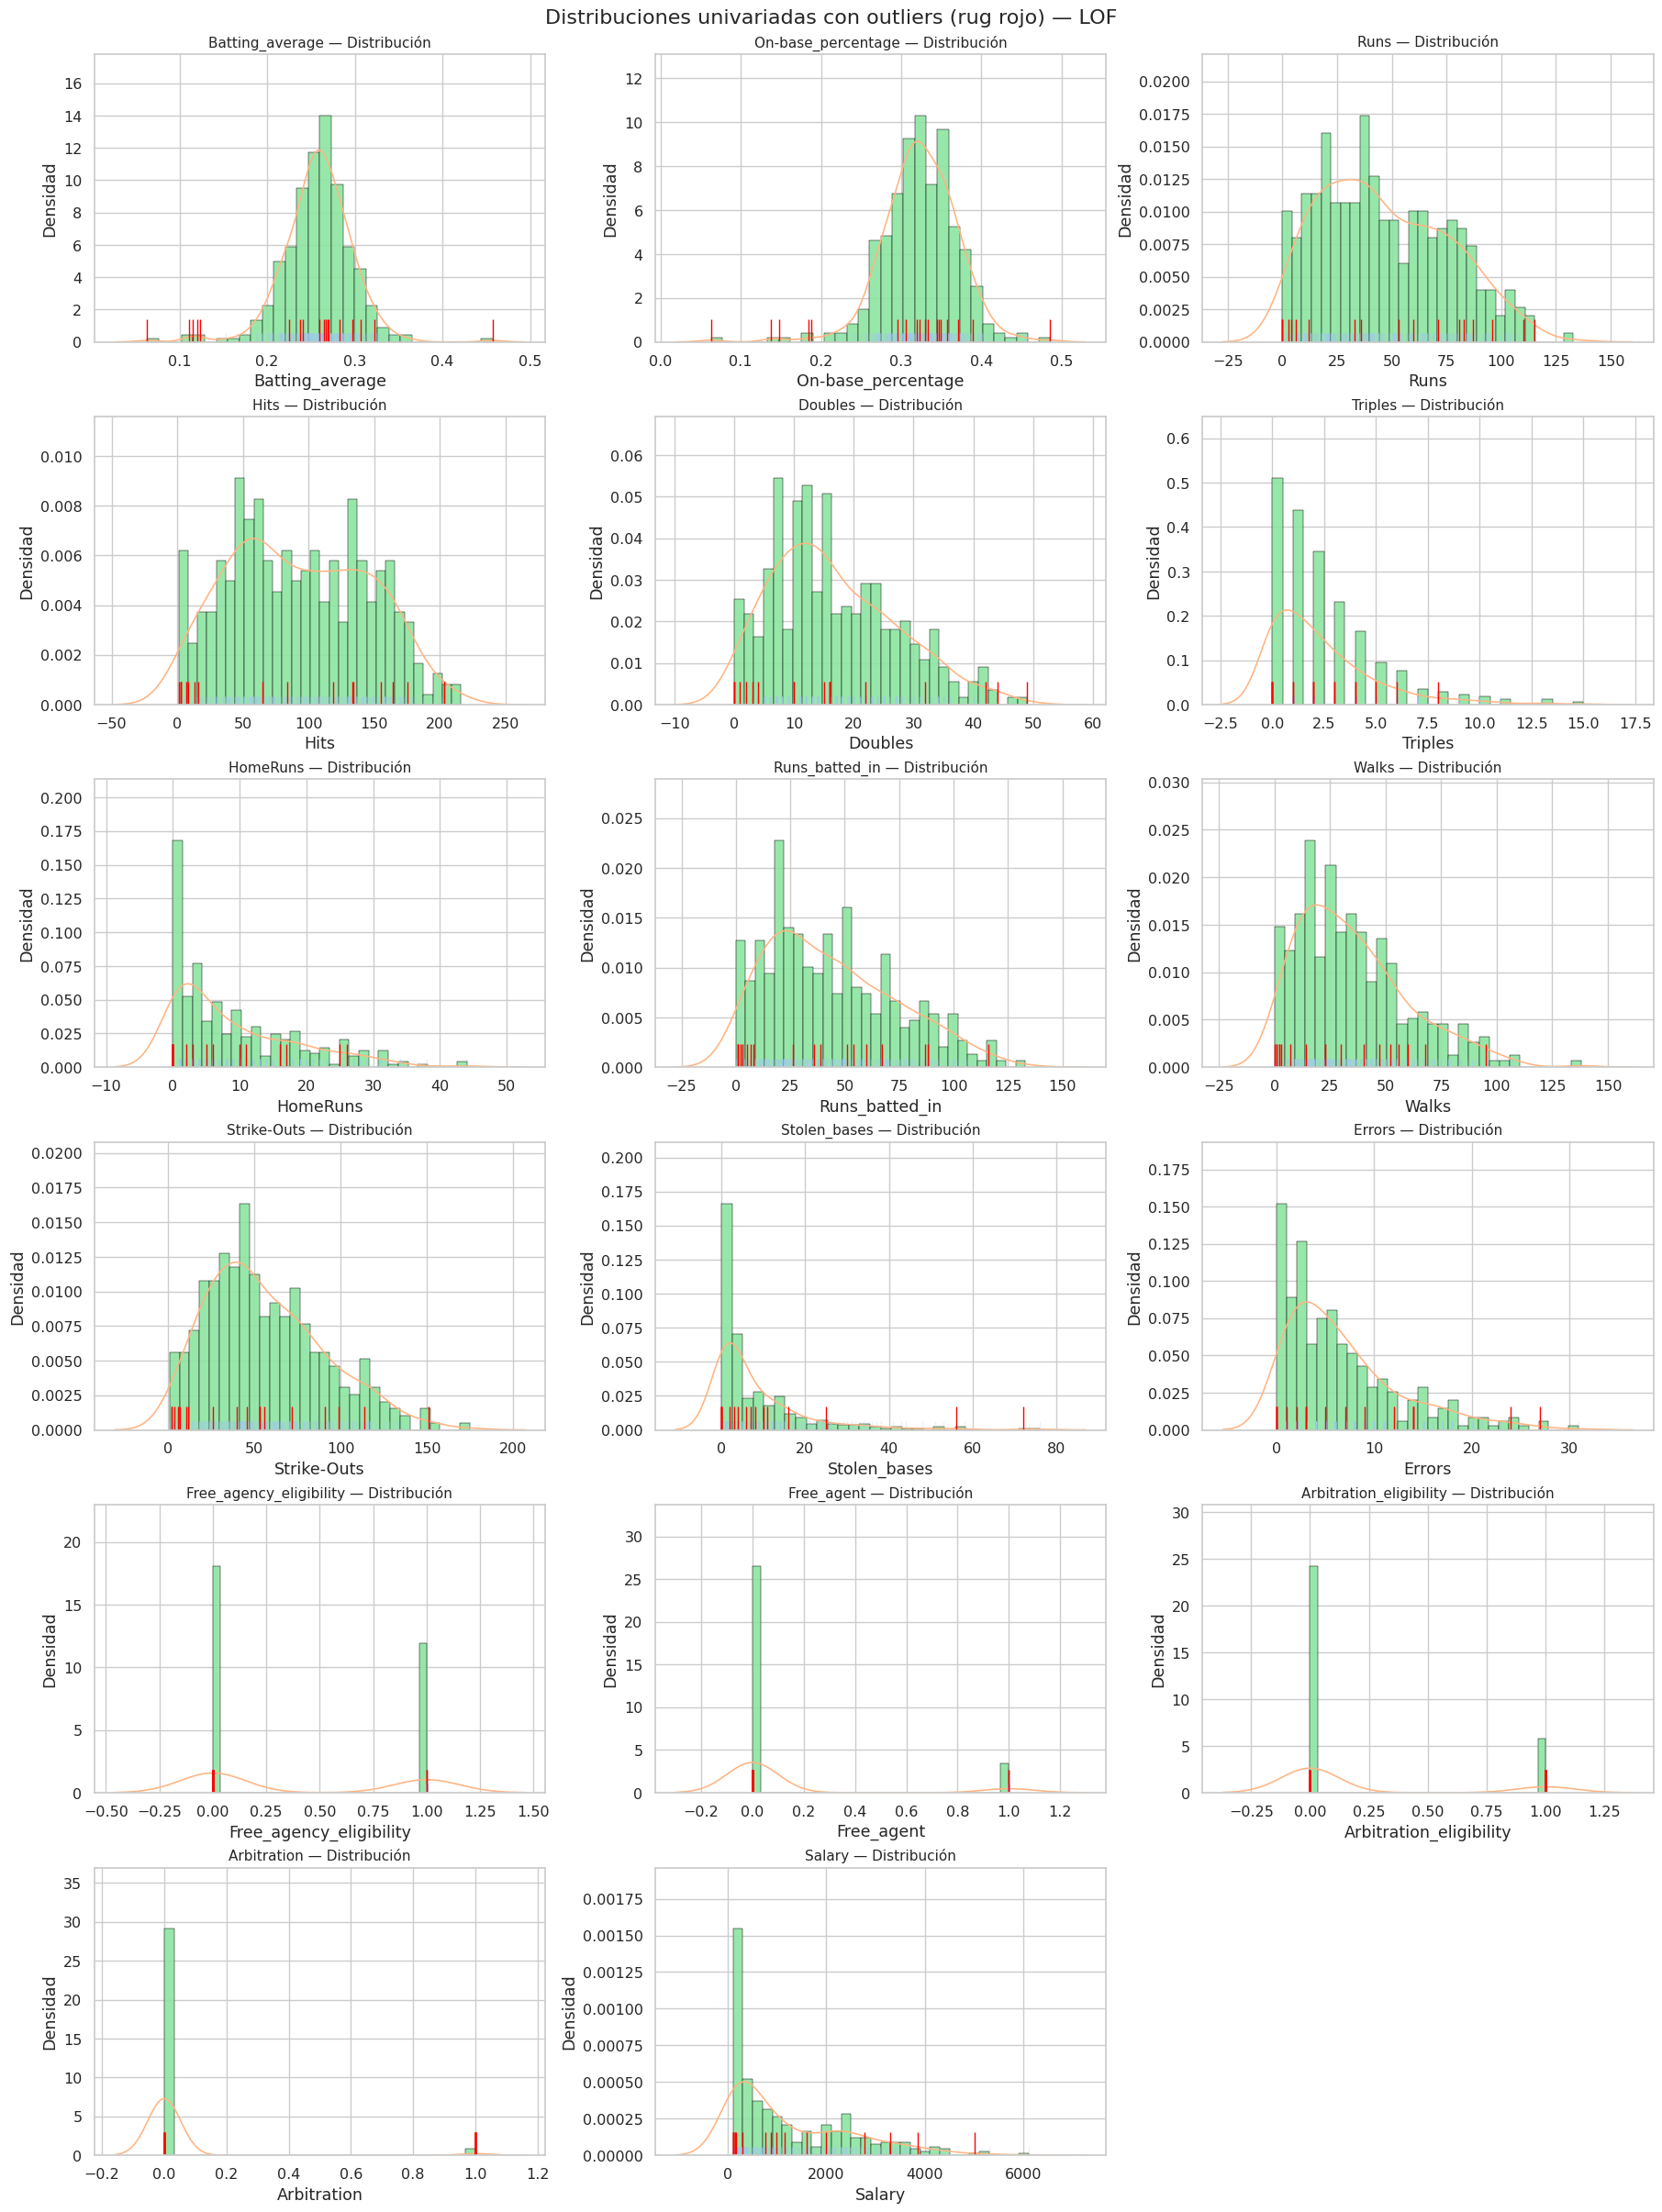

In [11]:

# Distribuciones univariadas: hist + KDE + rug con outliers en rojo
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], kde=False, bins=30, ax=ax, stat="density",
                 color=color_main, edgecolor="black", linewidth=0.35, alpha=0.9)
    sns.kdeplot(df[col], ax=ax, color=color_kde, linewidth=1.15, fill=False)
    ax.set_title(f"{col} — Distribución", fontsize=11)
    ax.set_ylabel("Densidad")
    # rug para inliers (sutil)
    sns.rugplot(df.loc[~df["is_outlier"], col], ax=ax, height=0.03, alpha=0.25)
    # rug para outliers (destacado en rojo)
    sns.rugplot(df.loc[df["is_outlier"], col], ax=ax, height=0.08, color="red")


for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle("Distribuciones univariadas con outliers (rug rojo) — LOF", fontsize=16)
plt.show()

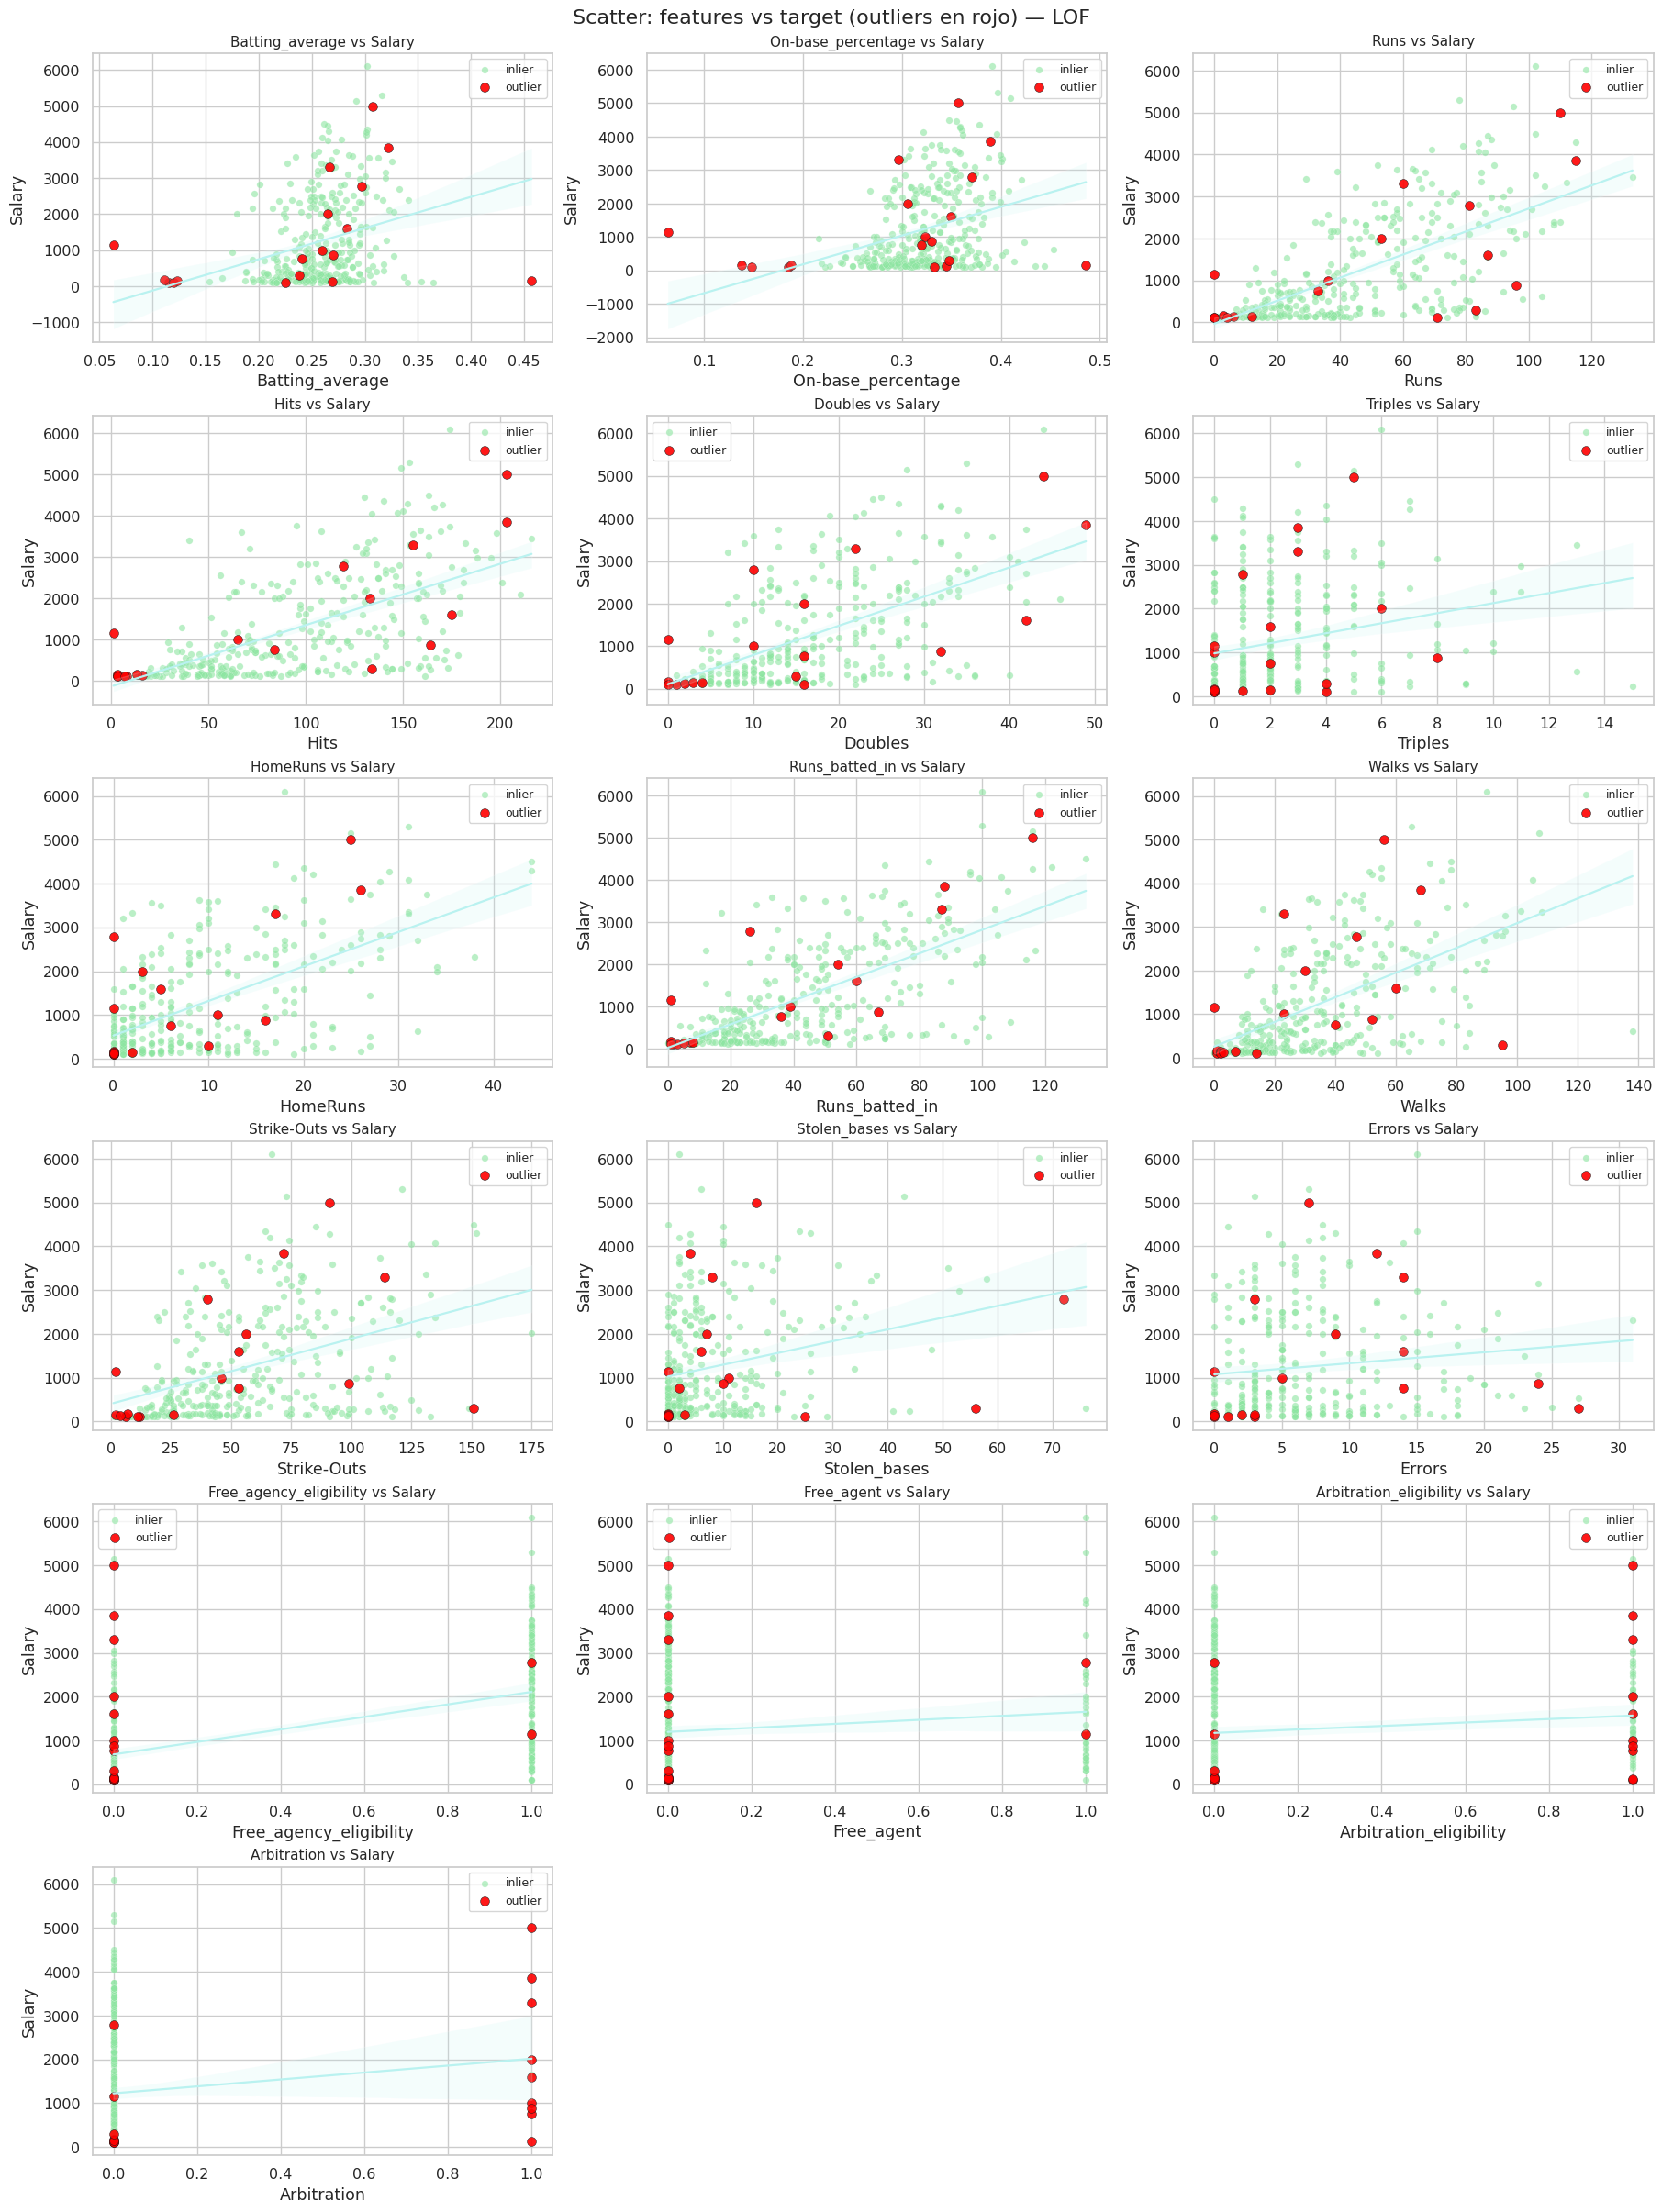

In [12]:
target = "Salary"
features_no_target = [c for c in features if c != target]
n2 = len(features_no_target)
rows2 = math.ceil(n2 / cols_per_row)

fig, axes = plt.subplots(rows2, cols_per_row, figsize=(18, 4*rows2), constrained_layout=True)
axes = axes.flatten()

for i, feat in enumerate(features_no_target):
    ax = axes[i]
    # plot inliers
    sns.scatterplot(x=df.loc[~df["is_outlier"], feat], y=df.loc[~df["is_outlier"], target],
                    ax=ax, color=color_main, s=28, alpha=0.6, edgecolor="w", linewidth=0.2, label="inlier")
    # plot outliers in red
    sns.scatterplot(x=df.loc[df["is_outlier"], feat], y=df.loc[df["is_outlier"], target],
                    ax=ax, color="red", s=50, alpha=0.9, edgecolor="k", linewidth=0.4, label="outlier")
    # tendencia sobre todos los datos
    sns.regplot(x=df[feat], y=df[target], scatter=False, ax=ax, line_kws={"color": color_accent, "linewidth":1.6})
    ax.set_title(f"{feat} vs {target}", fontsize=11)
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.legend(loc="best", fontsize=9)

for j in range(n2, rows2*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle("Scatter: features vs target (outliers en rojo) — LOF", fontsize=16)
plt.show()

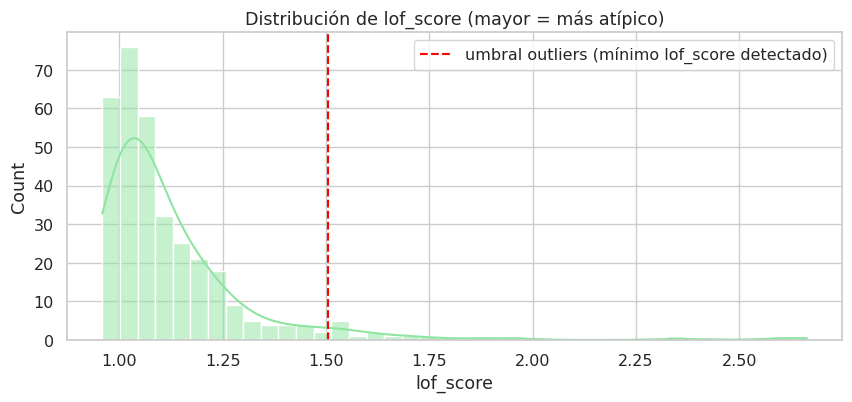

In [13]:
# Mapa de scores LOF (histograma + top outliers)
plt.figure(figsize=(10,4))
sns.histplot(df["lof_score"], bins=40, kde=True, color=color_main)
plt.title("Distribución de lof_score (mayor = más atípico)")
plt.xlabel("lof_score")
plt.axvline(df.loc[df['is_outlier'], 'lof_score'].min(), color="red", linestyle="--",
            label="umbral outliers (mínimo lof_score detectado)")
plt.legend()
plt.show()

In [14]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 1. Define la rejilla completa de hiperparámetros
neighbors_grid = [3, 9, 15, 27, 49]
metric_grid = ['euclidean', 'manhattan', 'minkowski']

results = []

print("Iniciando búsqueda manual en rejilla...")

for n_neighbors, metric in product(neighbors_grid, metric_grid):

    # Crea la instancia de LOF con la combinación actual
    lof = LocalOutlierFactor(
        n_neighbors=n_neighbors,
        metric=metric,
        novelty=False
    )

    # Ajusta y predice
    y_pred = lof.fit_predict(X_scaled)

    # Calcula las métricas
    lof_score = -lof.negative_outlier_factor_
    n_outliers = (y_pred == -1).sum()

    # Calcula el score medio solo si se encontraron outliers
    mean_lof = lof_score[y_pred == -1].mean() if n_outliers > 0 else 0.0

    # Guarda los resultados
    results.append({
        "n_neighbors": n_neighbors,
        "metric": metric,
        "n_outliers": n_outliers,
        "mean_lof_score": mean_lof
    })

print("¡Búsqueda finalizada!")

df_grid = pd.DataFrame(results)


df_grid_sorted = df_grid.sort_values(by="mean_lof_score", ascending=False).reset_index(drop=True)

print("\n--- Top 15 Mejores Combinaciones (según Mean LOF Score) ---")
display(df_grid_sorted.head(15))

Iniciando búsqueda manual en rejilla...
¡Búsqueda finalizada!

--- Top 15 Mejores Combinaciones (según Mean LOF Score) ---


,n_neighbors,metric,n_outliers,mean_lof_score
0,3,manhattan,13,1.971907
1,9,manhattan,8,1.951412
2,15,manhattan,9,1.888009
3,27,manhattan,8,1.878786
4,3,euclidean,11,1.870124
5,3,minkowski,11,1.870124
6,15,euclidean,12,1.865760
7,15,minkowski,12,1.865760
8,49,euclidean,16,1.794385
9,49,minkowski,16,1.794385


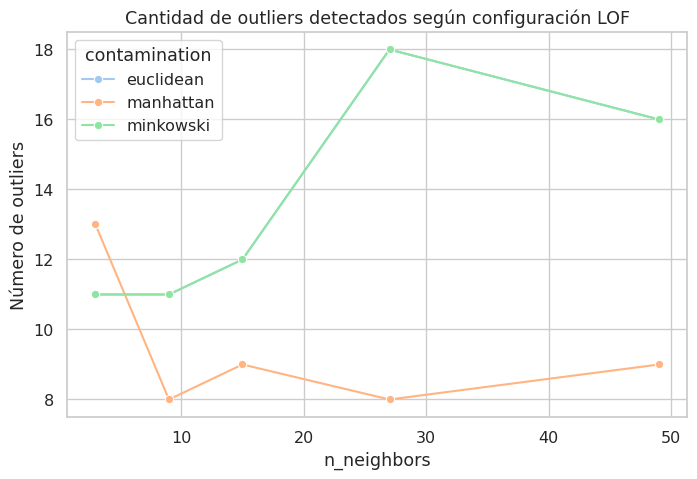

In [16]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_grid, x="n_neighbors", y="n_outliers",
      hue="metric", marker="o", palette="pastel")
plt.title("Cantidad de outliers detectados según configuración LOF")
plt.ylabel("Número de outliers")
plt.xlabel("n_neighbors")
plt.legend(title="contamination")
plt.show()


In [17]:
# Crear un DataFrame limpio sin outliers
df_clean = df[~df["is_outlier"]].copy()

print(f"Dataset original: {df.shape[0]} filas")
print(f"Outliers eliminados: {df['is_outlier'].sum()}")
print(f"Dataset limpio: {df_clean.shape[0]} filas")

# Vista rápida de los primeros registros
display(df_clean.head())


Dataset original: 337 filas
Outliers eliminados: 18
Dataset limpio: 319 filas


,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary,lof_score,is_outlier
0,0.271,0.328,74.0,161.0,22.0,6.0,12.0,58.0,49.0,133.0,23.0,17.0,1.0,1.0,0.0,0.0,109.0,1.219400,False
1,0.264,0.318,24.0,48.0,7.0,0.0,1.0,22.0,15.0,18.0,0.0,7.0,0.0,0.0,0.0,0.0,160.0,0.985476,False
2,0.251,0.338,101.0,141.0,35.0,3.0,32.0,105.0,71.0,104.0,34.0,6.0,0.0,0.0,1.0,0.0,2700.0,1.174894,False
3,0.224,0.274,28.0,94.0,21.0,1.0,1.0,44.0,27.0,54.0,2.0,7.0,1.0,1.0,0.0,0.0,550.0,0.994884,False
4,0.206,0.262,14.0,51.0,18.0,1.0,1.0,28.0,17.0,26.0,0.0,3.0,1.0,1.0,0.0,0.0,300.0,1.066415,False


In [19]:
df_clean = pd.read_csv("baseball_cleanLOF.csv")
display(df_clean.head())

,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary,lof_score,is_outlier
0,0.271,0.328,74.0,161.0,22.0,6.0,12.0,58.0,49.0,133.0,23.0,17.0,1.0,1.0,0.0,0.0,109.0,1.219400,False
1,0.264,0.318,24.0,48.0,7.0,0.0,1.0,22.0,15.0,18.0,0.0,7.0,0.0,0.0,0.0,0.0,160.0,0.985476,False
2,0.251,0.338,101.0,141.0,35.0,3.0,32.0,105.0,71.0,104.0,34.0,6.0,0.0,0.0,1.0,0.0,2700.0,1.174894,False
3,0.224,0.274,28.0,94.0,21.0,1.0,1.0,44.0,27.0,54.0,2.0,7.0,1.0,1.0,0.0,0.0,550.0,0.994884,False
4,0.206,0.262,14.0,51.0,18.0,1.0,1.0,28.0,17.0,26.0,0.0,3.0,1.0,1.0,0.0,0.0,300.0,1.066415,False


## Prepare data for simple linear regression

### Subtask:
Define the feature (e.g., one of the highly correlated features like 'Runs_batted_in') and the target variable ('Salary') for the simple linear regression model.


**Reasoning**:
Define the feature and target variables for the simple linear regression model and display their heads.



In [20]:
X_linear = df_clean[['Runs_batted_in']]
y_linear = df_clean['Salary']

print("First few rows of X_linear:")
display(X_linear.head())

print("\nFirst few rows of y_linear:")
display(y_linear.head())

First few rows of X_linear:


,Runs_batted_in
0,58.0
1,22.0
2,105.0
3,44.0
4,28.0



First few rows of y_linear:


,Salary
0,109.0
1,160.0
2,2700.0
3,550.0
4,300.0


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [22]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

model_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

model_linear.fit(X_train_linear, y_train_linear)

y_pred_linear = model_linear.predict(X_test_linear)

mae_linear = mean_absolute_error(y_test_linear, y_pred_linear)

print(f"Mean Absolute Error (MAE) for the linear regression model: {mae_linear:.2f}")

Mean Absolute Error (MAE) for the linear regression model: 837.62


=== Evaluación con Validación Cruzada (MAE) ===
Linear: MAE promedio = 536.4948 (+/- 24.7608)
Ridge: MAE promedio = 534.9742 (+/- 24.4605)
Lasso: MAE promedio = 536.2818 (+/- 24.6220)
ElasticNet: MAE promedio = 572.7599 (+/- 46.1582)

=== Ajuste de Hiperparámetros ===
Ridge -> Mejor MAE: 531.9759 | Parámetros: {'regressor__alpha': 10}
Lasso -> Mejor MAE: 531.0756 | Parámetros: {'regressor__alpha': 10}
ElasticNet -> Mejor MAE: 532.3594 | Parámetros: {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.5}

✅ Mejor modelo final según MAE: Ridge


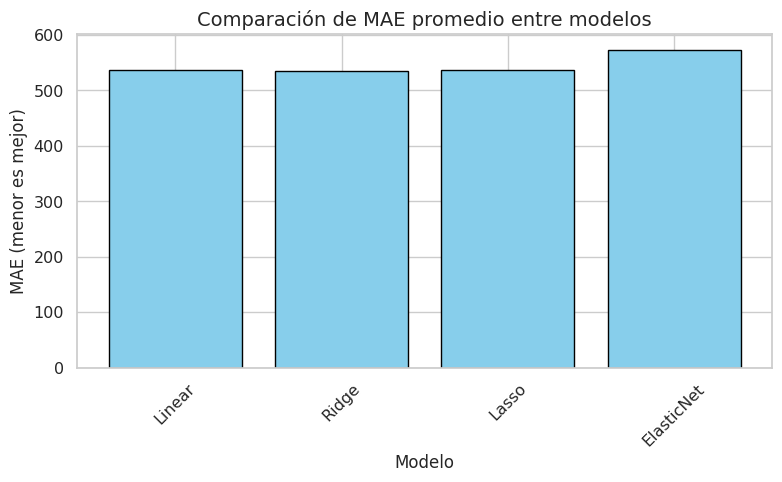

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


df = pd.read_csv("baseball_cleanLOF.csv")


X = df.drop(columns=["Salary"])
y = df["Salary"]

features_numericas = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
features_categoricas = X.select_dtypes(include=["object", "category"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), features_numericas),
        ("cat", OneHotEncoder(drop="first"), features_categoricas)
    ]
)

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

print("=== Evaluación con Validación Cruzada (MAE) ===")
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
    print(f"{name}: MAE promedio = {-scores.mean():.4f} (+/- {scores.std():.4f})")

param_grids = {
    "Ridge": {"regressor__alpha": [0.01, 0.1, 1, 10, 100]},
    "Lasso": {"regressor__alpha": [0.001, 0.01, 0.1, 1, 10]},
    "ElasticNet": {
        "regressor__alpha": [0.001, 0.01, 0.1, 1, 10],
        "regressor__l1_ratio": [0.2, 0.5, 0.8]
    }
}

print("\n=== Ajuste de Hiperparámetros ===")
best_models = {}

for name, grid in param_grids.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", models[name])
    ])
    search = GridSearchCV(pipe, grid, cv=5, scoring="neg_mean_absolute_error")
    search.fit(X, y)
    print(f"{name} -> Mejor MAE: {-search.best_score_:.4f} | Parámetros: {search.best_params_}")
    best_models[name] = search.best_estimator_

best_model_name = min(best_models, key=lambda k: -best_models[k].score(X, y))
print(f"\n✅ Mejor modelo final según MAE: {best_model_name}")

mae_scores = {}
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
    mae_scores[name] = -scores.mean()

df_scores = pd.DataFrame(list(mae_scores.items()), columns=["Modelo", "MAE"])
plt.figure(figsize=(8, 5))
plt.bar(df_scores["Modelo"], df_scores["MAE"], color="skyblue", edgecolor="black")
plt.title("Comparación de MAE promedio entre modelos", fontsize=14)
plt.ylabel("MAE (menor es mejor)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


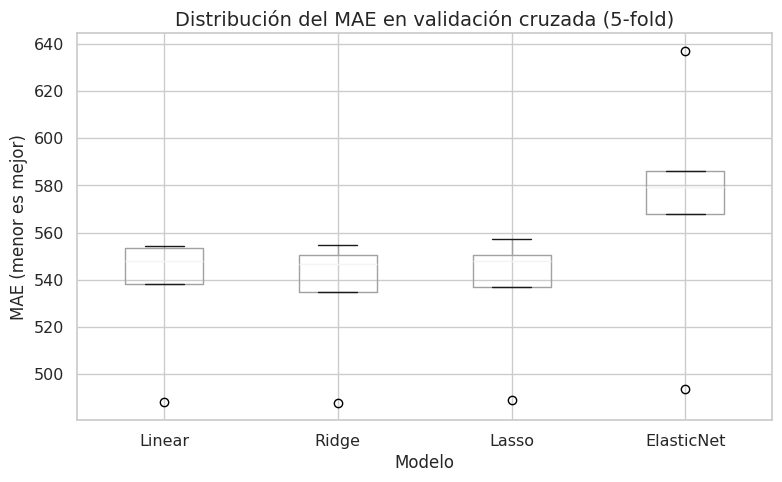

In [28]:
cv_results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
    cv_results[name] = -scores  # convertir a positivo

# Convertir a DataFrame para boxplot
df_cv = pd.DataFrame(cv_results)

# 7. Graficar Boxplot
plt.figure(figsize=(8, 5))
df_cv.boxplot()
plt.title("Distribución del MAE en validación cruzada (5-fold)", fontsize=14)
plt.ylabel("MAE (menor es mejor)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.tight_layout()
plt.show()